# **Compose Language Descriptions using pretrained Stable-Diffusion 1v-4**

In [1]:
import torch

from PIL import Image
from torch import autocast
from pipeline_composable_stable_diffusion import ComposableStableDiffusionPipeline

has_cuda = torch.cuda.is_available()
device = torch.device('cuda:3')
print(device)

# initialize stable diffusion model
model = ComposableStableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base",
).to(device)

/home/jaewan/jaewan/anaconda3/envs/mcc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data1/jaewan/developing/projects/machine learning/deep learning/diffusion/multiclass_consistency/mcg/pipeline_composable_stable_diffusion.py:15: FutureWarning: Importing `DiffusionPipeline` or `ImagePipelineOutput` from diffusers.pipeline_utils is deprecated. Please import from diffusers.pipelines.pipeline_utils instead.
  from diffusers.pipeline_utils import DiffusionPipeline


cuda:3


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  9.21it/s]


composing ['a car', 'a sun on the right corner', 'dark']...


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


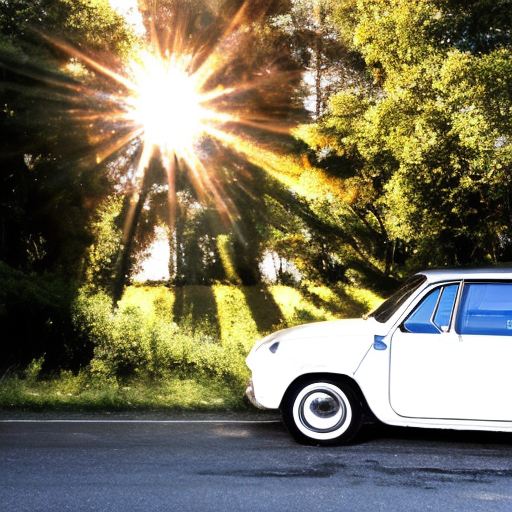

In [30]:
import torch
from IPython.display import display

# Sampling parameters
#@markdown Here is an example of composing sentences using conjunction operator (AND). \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter. \
#@markdown `scale`: default weight for each prompt
prompt = "a car | a sun on the right corner | dark" #@param{type: 'string'}
weights = "7.5 | 7.5 | -7.5" #@param{type: 'string'}
scale = 7.5 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 0 #@param{type: 'number'}
generator = torch.Generator('cuda:3').manual_seed(seed)

image = model(prompt, guidance_scale=scale, generator=generator,
              num_inference_steps=steps, weights=weights).images[0]
display(image)

/data1/jaewan/developing/projects/machine learning/deep learning/diffusion/multiclass_consistency/mcc/pipeline_composable_stable_diffusion.py:501: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  num_channels_latents = self.unet.in_channels


composing ['a boy with red hat', 'red', 'a forest', 'foggy, dark']...


100%|██████████| 50/50 [00:15<00:00,  3.20it/s]


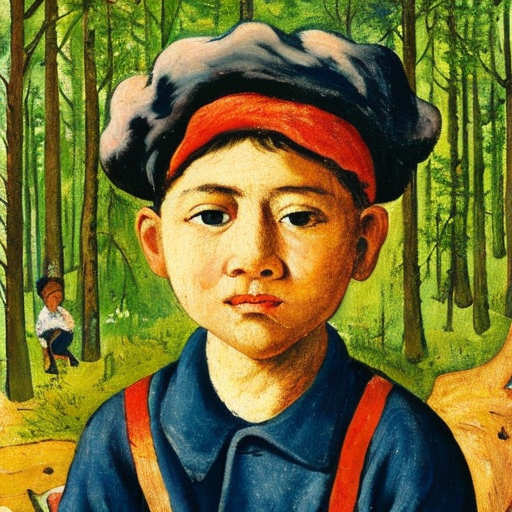

In [40]:
# Sampling parameters
#@markdown Here is an example of composing sentences using <b>Negation operator (NOT).</b> \
#@markdown <b>Negative weights should be assigned to the textes you wish to negate.</b> \
#@markdown `prompt`: when composing  multiple sentences, using `|` as the delimiter.\
#@markdown `weight`: weight indicates the weight importance of sentence when composing, also using `|` as the delimiter.
prompt = "a boy with red hat | red | a forest | foggy, dark" #@param{type: 'string'}
weights = "7.5 | -7.5 | 7.5 | -7.5" #@param{type: 'string'}
scale = 7.5 #@param{type: 'number'}
steps = 50 #@param{type: 'number'}
seed = 42 #@param{type: 'number'}
generator = torch.Generator('cuda').manual_seed(seed)

image = model(prompt, guidance_scale=scale, generator=generator,
              num_inference_steps=steps, weights=weights).images[0]
display(image)